Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 49, 9, 128)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 4, 128)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 4, 128)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1572992   
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

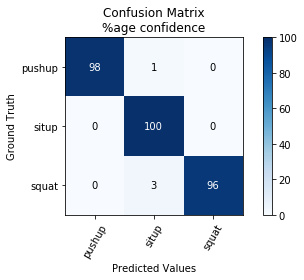

In [64]:
# importing the dependencies
from tensorflow.keras.models import load_model
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import os
# defining a function for plotting the confusion matrix
# takes cmNormalized
os.environ['QT_PLUGIN_PATH'] = ''
def plot_cm(cM, labels,title):
    # normalizing the confusionMatrix for showing the probabilities
    cmNormalized = np.around((cM/cM.sum(axis=1)[:,None])*100,2)
    # creating a figure object
    fig = plt.figure()
    # plotting the confusion matrix
    plt.imshow(cmNormalized,interpolation=None,cmap = plt.cm.Blues)
    # creating a color bar and setting the limits
    plt.colorbar()
    plt.clim(0,100)
    # assiging the title, x and y labels
    plt.xlabel('Predicted Values')
    plt.ylabel('Ground Truth')
    plt.title(title + '\n%age confidence')
    # defining the ticks for the x and y axis
    plt.xticks(range(len(labels)),labels,rotation = 60)
    plt.yticks(range(len(labels)),labels)
    # number of occurences in the boxes
    width, height = cM.shape 
    print('Accuracy for each class is given below.')
    for predicted in range(width):
        for real in range(height):
            color = 'black'
            if(predicted == real):
                color = 'white'
                print(labels[predicted].ljust(12)+ ':', cmNormalized[predicted,real], '%')
            plt.gca().annotate(
                    '{:d}'.format(int(cmNormalized[predicted,real])),xy=(real, predicted),
                    horizontalalignment = 'center',verticalalignment = 'center',color = color)
    # making sure that the figure is not clipped
    plt.tight_layout()
    # saving the figure
    fig.savefig(title +'.png')
# loading the pretrained model
model = load_model('model.h5')
model.summary()
#loading the testData and groundTruth data
test_x = np.load('testData.npy')
groundTruth = np.load('groundTruth.npy')
# evaluating the model


#score = model.evaluate(test_x,groundTruth,verbose=2)
print('Baseline Error: %.2f%%' %(100-score[1]*100))
'''
 Creating and plotting a confusion matrix

'''
# defining the class labels
#labels = ['Downstairs','Jogging','Sitting','Standing','Upstairs','Walking']
labels = ['pushup','situp','squat']
#labels = ['situp','squat']
# predicting the classes
predictions = model.predict(test_x,verbose=2)


xxx = model.predict_classes(test_x)
print('predict',xxx)

answer=[]
for i in groundTruth:
    answer.append(*np.where(i==1)[0])
print('answer',answer)



# getting the class predicted and class in ground truth for creation of confusion matrix
predictedClass = np.zeros((predictions.shape[0]))
groundTruthClass = np.zeros((groundTruth.shape[0]))
for instance in range (groundTruth.shape[0]):
    predictedClass[instance] = np.argmax(predictions[instance,:])
    groundTruthClass[instance] = np.argmax(groundTruth[instance,:])

# obtaining a confusion matrix  
cm = metrics.confusion_matrix(answer,xxx)
#cm = metrics.confusion_matrix(groundTruthClass,xxx)
# plotting the confusion matrix
plot_cm(cm, labels,'Confusion Matrix')